In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('train.csv')
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,248.682615,0.0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14.0,0.0,0.0,0.0,1.0,NaN,1.0,12.0,26.500150,1.0
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14.0,0.0,0.0,0.0,1.0,NaN,1.0,12.0,24.693619,2.0
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14.0,0.0,0.0,0.0,1.0,NaN,1.0,12.0,48.406926,3.0
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,3.899395,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23402 entries, 0 to 23401
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                23402 non-null  int64  
 1   State_Factor               23402 non-null  object 
 2   building_class             23402 non-null  object 
 3   facility_type              23402 non-null  object 
 4   floor_area                 23402 non-null  float64
 5   year_built                 22031 non-null  float64
 6   energy_star_rating         13525 non-null  float64
 7   ELEVATION                  23402 non-null  float64
 8   january_min_temp           23402 non-null  int64  
 9   january_avg_temp           23402 non-null  float64
 10  january_max_temp           23402 non-null  int64  
 11  february_min_temp          23402 non-null  int64  
 12  february_avg_temp          23402 non-null  float64
 13  february_max_temp          23402 non-null  int

In [ ]:
X =df[['max_wind_speed','energy_star_rating']]
Y = df['site_eui']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=22)


In [ ]:
X_train.shape, X_test.shape

((18721, 2), (4681, 2))

In [ ]:
df.shape

(23402, 64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23402 entries, 0 to 23401
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                23402 non-null  int64  
 1   State_Factor               23402 non-null  object 
 2   building_class             23402 non-null  object 
 3   facility_type              23402 non-null  object 
 4   floor_area                 23402 non-null  float64
 5   year_built                 22031 non-null  float64
 6   energy_star_rating         13525 non-null  float64
 7   ELEVATION                  23402 non-null  float64
 8   january_min_temp           23402 non-null  int64  
 9   january_avg_temp           23402 non-null  float64
 10  january_max_temp           23402 non-null  int64  
 11  february_min_temp          23402 non-null  int64  
 12  february_avg_temp          23402 non-null  float64
 13  february_max_temp          23402 non-null  int

In [ ]:
df.isnull().mean()

Year_Factor                  0.000000
State_Factor                 0.000000
building_class               0.000000
facility_type                0.000000
floor_area                   0.000000
                               ...   
direction_peak_wind_speed    0.634262
max_wind_speed               0.632638
days_with_fog                0.568242
site_eui                     0.000043
id                           0.000043
Length: 64, dtype: float64

In [ ]:
mean_wind = X_train['max_wind_speed'].mean()
median_wind = X_train['max_wind_speed'].median()

mean_rating = X_train['energy_star_rating'].mean()
median_rating = X_train['energy_star_rating'].median()

In [ ]:
X_train['wind_mean'] = X_train['max_wind_speed'].fillna(mean_wind)

In [ ]:
X_train['median_wind'] = X_train['max_wind_speed'].fillna(median_wind)
X_train['mean_rating'] = X_train['energy_star_rating'].fillna(mean_rating)
X_train['median_rating'] = X_train['energy_star_rating'].fillna(mean_rating)

In [ ]:
X_train.sample(5)

,max_wind_speed,energy_star_rating,wind_mean,median_wind,median_rating,mean_rating
11945,17.4,29.0,17.40000,17.4,29.000000,29.000000
17983,NaN,79.0,1.71478,1.0,79.000000,79.000000
15281,1.0,NaN,1.00000,1.0,63.918326,63.918326
16082,1.0,34.0,1.00000,1.0,34.000000,34.000000
4807,NaN,33.0,1.71478,1.0,33.000000,33.000000


In [ ]:
print('variance of wind is:', X_train['max_wind_speed'].var())
print('variance of wind_mean is: ',X_train['wind_mean'].var())
print('variance of median_wind is:',X_train['median_wind'].var())

variance of wind is: 11.142149834719529
variance of wind_mean is:  4.078907735968639
variance of median_wind is: 4.1974831263807655


In [ ]:
print('variance of energy_star_rating is:', X_train['energy_star_rating'].var())
print('variance of mean_rating is:', X_train['mean_rating'].var())
print('variance of median_rating is:', X_train['median_rating'].var())

variance of energy_star_rating is: 757.8281217663326
variance of mean_rating is: 439.11119854697705
variance of median_rating is: 439.11119854697705


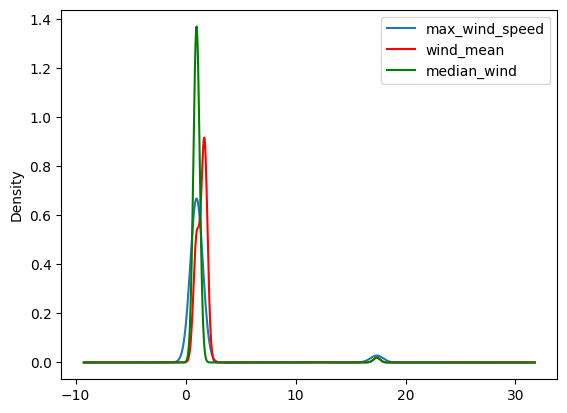

In [ ]:
fig=plt.figure()
ax =fig.add_subplot(111)

X_train['max_wind_speed'].plot(kind='kde', ax=ax)
X_train['wind_mean'].plot(kind='kde', ax=ax, color ='red')
X_train['median_wind'].plot(kind='kde',ax=ax,color='green')
lines,labels =ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

In [ ]:
X_train.cov()

,max_wind_speed,energy_star_rating,wind_mean,median_wind,median_rating,mean_rating
max_wind_speed,11.142150,-7.172915,11.142150,11.142150,-2.529162,-2.529162
energy_star_rating,-7.172915,757.828122,-1.597893,-1.581801,757.828122,757.828122
wind_mean,11.142150,-1.597893,4.078908,4.078908,-0.925873,-0.925873
median_wind,11.142150,-1.581801,4.078908,4.197483,-0.916549,-0.916549
median_rating,-2.529162,757.828122,-0.925873,-0.916549,439.111199,439.111199
mean_rating,-2.529162,757.828122,-0.925873,-0.916549,439.111199,439.111199


In [ ]:
X_train.corr()

,max_wind_speed,energy_star_rating,wind_mean,median_wind,median_rating,mean_rating
max_wind_speed,1.000000,-0.058431,1.000000,1.000000,-0.046639,-0.046639
energy_star_rating,-0.058431,1.000000,-0.026958,-0.026002,1.000000,1.000000
wind_mean,1.000000,-0.026958,1.000000,0.985774,-0.021877,-0.021877
median_wind,1.000000,-0.026002,0.985774,1.000000,-0.021349,-0.021349
median_rating,-0.046639,1.000000,-0.021877,-0.021349,1.000000,1.000000
mean_rating,-0.046639,1.000000,-0.021877,-0.021349,1.000000,1.000000


<Axes: >

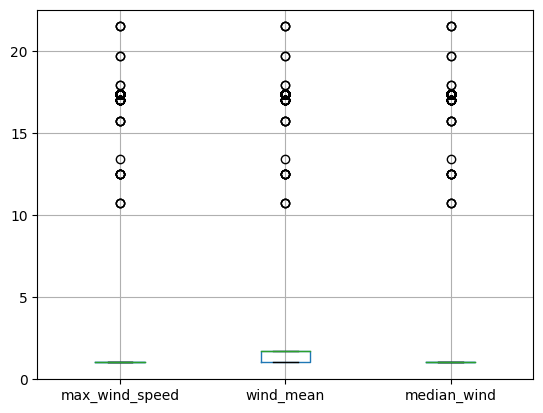

In [ ]:
X_train[['max_wind_speed','wind_mean','median_wind']].boxplot()

## Using SKlearn

In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [ ]:
transformer = ColumnTransformer([('imputer1', imputer1,['max_wind_speed']),('imputer2',imputer2,['energy_star_rating'])],remainder='passthrough')

In [ ]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['max_wind_speed']),
                                ('imputer2', SimpleImputer(),
                                 ['energy_star_rating'])])

In [ ]:
transformer.named_transformers_['imputer1'].statistics_

array([1.])

In [ ]:
transformer.named_transformers_['imputer2'].statistics_

array([63.91832596])